In [1]:
# import libraries
import os
import sys

from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.feature_importance_plot import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot

In [2]:
# load the data

features, target = load_diabetes(return_X_y=True, as_frame=True)

In [3]:
# explore the features data
# more information on the features can be found here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
# note: the data has already been mean centred and scaled

features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
# shape of the data
features.shape

# question: how many rows and columns do we have?

(442, 10)

In [5]:
# question: do we have any missing data?

features.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [6]:
# check the info 
features.info()

# question: do we need to encode any variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


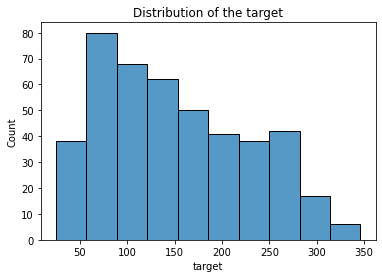

In [7]:
# explore the target
# quantitative measure of disease progression one year after baseline

sns.histplot(target)
plt.title("Distribution of the target");

# question: what is the skew of this data=

In [8]:
target.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [9]:
# check the shape of the target

target.shape

# question: how many rows and columns?


(442,)

In [10]:
type(target)

pandas.core.series.Series

In [11]:
type(features)

pandas.core.frame.DataFrame

In [12]:
# split the data into a train and test set

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, 
                                                    test_size=0.33, random_state=8888)

In [13]:
# check the shape of the data

print("Training data")
print(X_train.shape)
print(y_train.shape)


Training data
(296, 10)
(296,)


In [14]:
print("Test data")
print(X_test.shape)
print(y_test.shape)


Test data
(146, 10)
(146,)


In [22]:
# Build a Random Forest Model

rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500)

In [23]:
y_pred_rf = rf.predict(X_test)

print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [190.82  116.448 165.592 177.894 115.208]
first five actual values: [212.0, 214.0, 221.0, 156.0, 128.0]


In [24]:
r2 = r2_score(y_test, y_pred_rf)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_test, y_pred_rf)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", round(mse))

R2: 0.5
Explained Variance: 0.51
Mean Absolute Error: 46
Mean Squared Error: 3002


In [18]:
# the evaluation metrics for the model on the training set
# this is useful for identifying overfitting

y_pred_train_rf = rf.predict(X_train)

r2 = r2_score(y_train, y_pred_train_rf)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_train, y_pred_train_rf)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_train, y_pred_train_rf)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train, y_pred_train_rf)
print("Mean Squared Error:", round(mse))

# seeing low error rates on the training set - signs of overfitting

R2: 0.92
Explained Variance: 0.92
Mean Absolute Error: 18
Mean Squared Error: 486


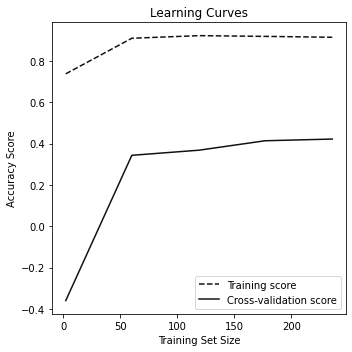

In [19]:
# learning curves

learning_curve_plot(rf, X_train, y_train, scoring = 'r2')

# what can we conclude about the random forest model based on the learning curves?  signs of overfitting and high variance
# unusual shape of the learning curve

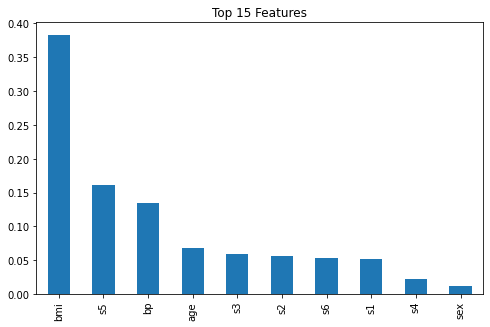

In [70]:
feature_importance_plot(rf, X_train, n=15)

# question: what is the most important feature?

#### Hyperparameter Tuning

In [21]:
RandomForestRegressor(n_estimators = 500)

RandomForestRegressor(n_estimators=500)

In [85]:
# Let’s say we want to span the n_estimators hyperparameter from 100 to 500 with a step of 100 and the max_features hyperparameter from 0.1 to 1.0 with a step of 0.05. We are looking for the combination of these ranges that maximizes the average value of R2 in 5-fold cross-validation

params = {'n_estimators':np.arange(100,500,100),
          'max_features':np.arange(0.1,1.0,0.05)}

In [91]:
# Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
# It is an exhaustive search that is performed on a the specific parameter values of a model. 
# The model is also known as an estimator. Grid search exercise can save us time, effort and resources.

grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           params,
                           cv=5, 
                           scoring="r2",
                           verbose=1,
                           n_jobs=-1
                           )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='r2', verbose=1)

In [80]:
grid_search.best_params_

{'max_features': 0.5000000000000001, 'n_estimators': 300}

In [81]:
grid_search.best_score_

0.41440505501896074

In [82]:
# pass in the best parameters

rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(X_train, y_train)


RandomForestRegressor(max_features=0.5000000000000001, n_estimators=300)

In [83]:
y_pred_rf = rf.predict(X_test)

print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [147.53       173.00333333 143.94333333 255.28666667 117.50666667]
first five actual values: [219.0, 70.0, 202.0, 230.0, 111.0]


In [84]:
r2 = r2_score(y_test, y_pred_rf)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_test, y_pred_rf)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", round(mse))

# do we see any improvements??

R2: 0.49
Explained Variance: 0.49
Mean Absolute Error: 43
Mean Squared Error: 2923


In [92]:
# if Grid search is taking too long, can use Random search,
# Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. 
# The selection of parameters is completely random.

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                                   params,
                                   cv=5,
                                   scoring="r2",
                                   verbose=1,
                                   n_jobs=-1, 
                                   random_state = 0
                                  )
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([100, 200, 300, 400])},
                   random_state=0, scoring='r2', verbose=1)

In [93]:
random_search.best_params_

# same as the Grid search

{'n_estimators': 300, 'max_features': 0.5000000000000001}

In [94]:
random_search.best_score_

0.41440505501896074